# LOFTI: Orbit Fitting of Wide Stellar Binaries with Gaia

The LOFTI-Gaia package will fit orbital elements to the astrometry provided by Gaia DR2 only.  
<br>
Written by Logan A. Pearce, 2019<br>
If you use LOFTI in your work please cite Pearce et al. 2019

## Fitting orbital parameters:

#### Begin by importing the "fitorbit" module

In [1]:
from lofti_gaia.lofti import fitorbit

Let's look at the arguements and what it writes out

In [2]:
help(fitorbit)

Help on function fitorbit in module lofti_gaia.lofti:

fitorbit(source_id1, source_id2, mass1=0, mass2=0, d=2015.5, verbose=False, output_directory='.', rank=0, accept_min=10000)
    Fit orbital parameters to binary stars using only the RA/DEC positions and proper motions from
    Gaia DR2 by inputting the source ids of the two objects and their masses only. 
    Writes accepted orbital parameters to a file.
    
    Parameters:
    -----------
    source_id1, source_id2 : int 
        Gaia DR2 source identifiers, found in the Gaia archive or Simbad.  Fit will be
        of source_id2 relative to source_id1.
    mass1, mass2 : tuple, flt [Msol]
        masses of primary and secondary objects, entered as a tuple with the error.  For example:
        mass1 = (1.0,0.2) is a 1 solar mass star with error of \pm 0.2 solar masses.  If mass1 or mass2 = 0,
        script will prompt user to input a tuple mass.  Default = 0.
    d : flt [decimalyear]
        observation date.  Default = 2015.5, 

## Example: DS Tuc AB:

The first use of this technique was for DS Tuc AB, and published in Newton et al. 2019.  Both components have well-defined solutions in Gaia DR2, including radial velocities.  It makes a good demostration case.<br>
Let's start by making a new directory to hold the output file

In [3]:
import os
os.system('mkdir DSTucAB')

256

All we need to give the fitter is the Gaia source ID numbers for the two components: 

In [4]:
DSTucA = 6387058411482257536
DSTucB = 6387058411482257280

and their masses (masses are from Newton et al. 2019).  fitorbit looks for the mass and its error to be entered as a tuple:

In [5]:
massA = (0.97, 0.04)
massB = (0.87, 0.04)

Run the fitter by calling fitorbit.  Let's tell it to output files to the directory we made, set a low minimum accepted orbit number for demonstration purposes, and set verbose to True.  When verbose is set to True, the fitter pauses and asks you to check that the constraints it will use look reasonable and like you expect them to, and makes sure it will write out the file where you are expecting to find it.  It will also print an update when it finds lower chi-squared values, and periodically prints the number of orbits it's found. <br>

To get a good posterior sample, you should look for thousands of accepted orbits.  I typically aim for 100,000 orbits as a good sample.  For demonstration purposes, let's just ask for 50 orbits.

In [6]:
fitorbit(DSTucA, DSTucB, 
         mass1 = massA, 
         mass2 = massB, 
         output_directory = "DSTucAB",
         verbose = True,
         accept_min = 50
        )

Computing constraints.
Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
Finished computing constraints:
Delta RA, err in mas: -1146.6530524844409 0.015946495992160997
Delta Dec, err in mas: 5240.634364261226 0.03140411699483365

pmRA, err in km/s: -0.30173712008430653 0.020545393993457103
pmDec, err in km/s: 0.3543703626789322 0.012283970508770524
deltaRV, err im km/s (pos towards observer): 1.8793611665844168 0.7354712000512816

Total relative velocity [km/s]: 1.9361358521672773 +/- 1.8795136082538342
Total plane-of-sky relative velocity [mas/yr]: 2.2246301214145014 +/- 0.11376315413334326

sep,err [mas] 5364.6119862415935 0.030969548907948157 pa,err [deg]: 347.6581552726796 0.00017916102851933162
sep [AU] 236.76199216882884
sep, err [km] (35419089891.146866, 0.0) (204472.0549169436, 0.0)
D_star 44.1340385429632 +\- 0.06336868730526682
Delta Gmag -1.0800505

Does this look good? Hit enter to start the fit, n to exit
Yeehaw let's go

With verbose = False (default), the print statements are supressed, the script does not pause to check with the user before proceeding, and a progress bar reports the status of the fit.

In [7]:
from lofti_gaia.lofti import fitorbit

DSTucA = 6387058411482257536
DSTucB = 6387058411482257280
massA = (0.97,0.04)
massB = (0.87, 0.04)

fitorbit(DSTucA, DSTucB, 
         mass1 = massA, 
         mass2 = massB, 
         output_directory = "DSTucAB",
         accept_min = 100
        )

Computing constraints.
Ok, starting loop
100% (107 of 100): |####################|  Done...

Found  107  orbits, finishing up...
This operation took 23.963433027267456 seconds
and 0.00665650917424096 hours


If you forget to enter the masses, the script will prompt you to enter the mass and error with a space between them.

In [8]:
fitorbit(DSTucA, DSTucB, 
         output_directory = "DSTucAB",
         accept_min = 100
        )

Computing constraints.
Enter mass of object 1 and error separated by a space (ex: 1.02 0.2):0.97 0.04
Enter mass of object 2 and error separated by a space (ex: 1.02 0.2):0.87 0.04
Ok, starting loop
100% (105 of 100): |####################|  Done...

Found  105  orbits, finishing up...
This operation took 17.085912704467773 seconds
and 0.004746086862352159 hours


## Plotting the output

lofti_gaia offers and optional setting of plotting tools to inspect the results of fitorbit, called lofti_gaia.lofti.makeplots.

In [9]:
from lofti_gaia.lofti import makeplots
help(makeplots)

Help on function makeplots in module lofti_gaia.lofti:

makeplots(input_directory, rank=0, Collect_into_one_file=False, limit=0.0, roll_w=False, plot_posteriors=True, plot_orbit_plane=True, plot_3d=True, axlim=6)
    Produce plots and summary statistics for the output from lofti.fitorbit.
    
    Parameters:
    -----------
    input_directory : str
        Gaia DR2 source identifiers, found in the Gaia archive or Simbad.  Fit will be
        of source_id2 relative to source_id1.
    rank : int
        Set this parameter to iterate through processes if running on multiple threads
    Collect_into_one_file : bool
        Set to true if running on multiple process and the script did not terminate on its own.  This will
        tell the script to collect output from each multiple process and put into one file.
    limit : int [au]
        Sometimes semi-major axis posteriors will have very long tails.  If you wish to truncate the sma histogram 
        at some value for clarity, set the 

The plots are written out to files in the directory you specified when you called makeplots.

In [10]:
directory = 'DSTucAB'
makeplots(directory,
                  rank = 0,
                  Collect_into_one_file = False,
                  limit = 0.,
                  roll_w = False,
                  plot_posteriors = True,
                  plot_orbit_plane = True,
                  plot_3d = True
              )

Writing out stats
Making histograms
Plotting observable posteriors
Plotting orbits
XY plane
XZ plane
YZ plane
3D


As with fitorbit, the output of this script is saved into the directory you set at the beginning.  Figures are saved as pngs.  

<br>Let's look at the figures this code generated: (If you're having trouble viewing within the notebook, there are examples in the github repo)

## hists.png:

Histograms won't look very nice for this tutorial because we only accepted ~100 orbits.  To really sample the posteriors well, you need ~100,000 sample orbits.

<IPython.core.display.Javascript object>


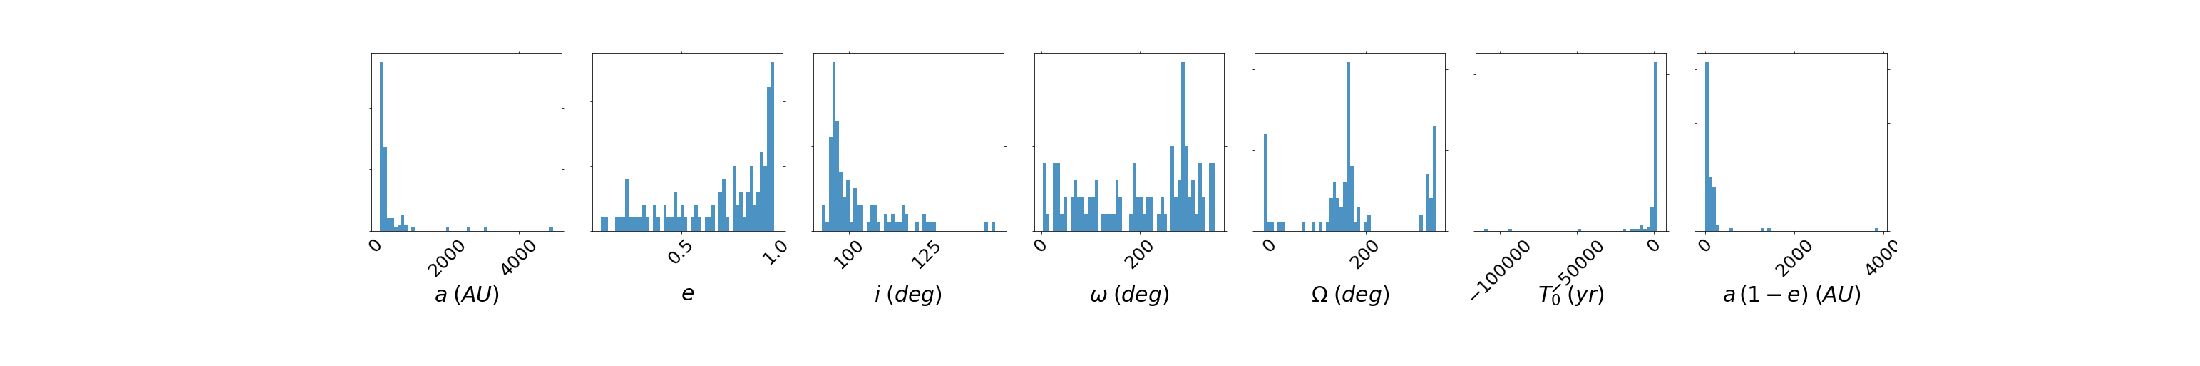

In [11]:
import matplotlib.image as mpimg
directory = 'DSTucAB'

%matplotlib notebook
img = mpimg.imread(directory+'/hists.png')
plt.figure(figsize=(11, 5.5/3))
plt.imshow(img)
plt.axis('off')
plt.show()

## orbits.png

<IPython.core.display.Javascript object>


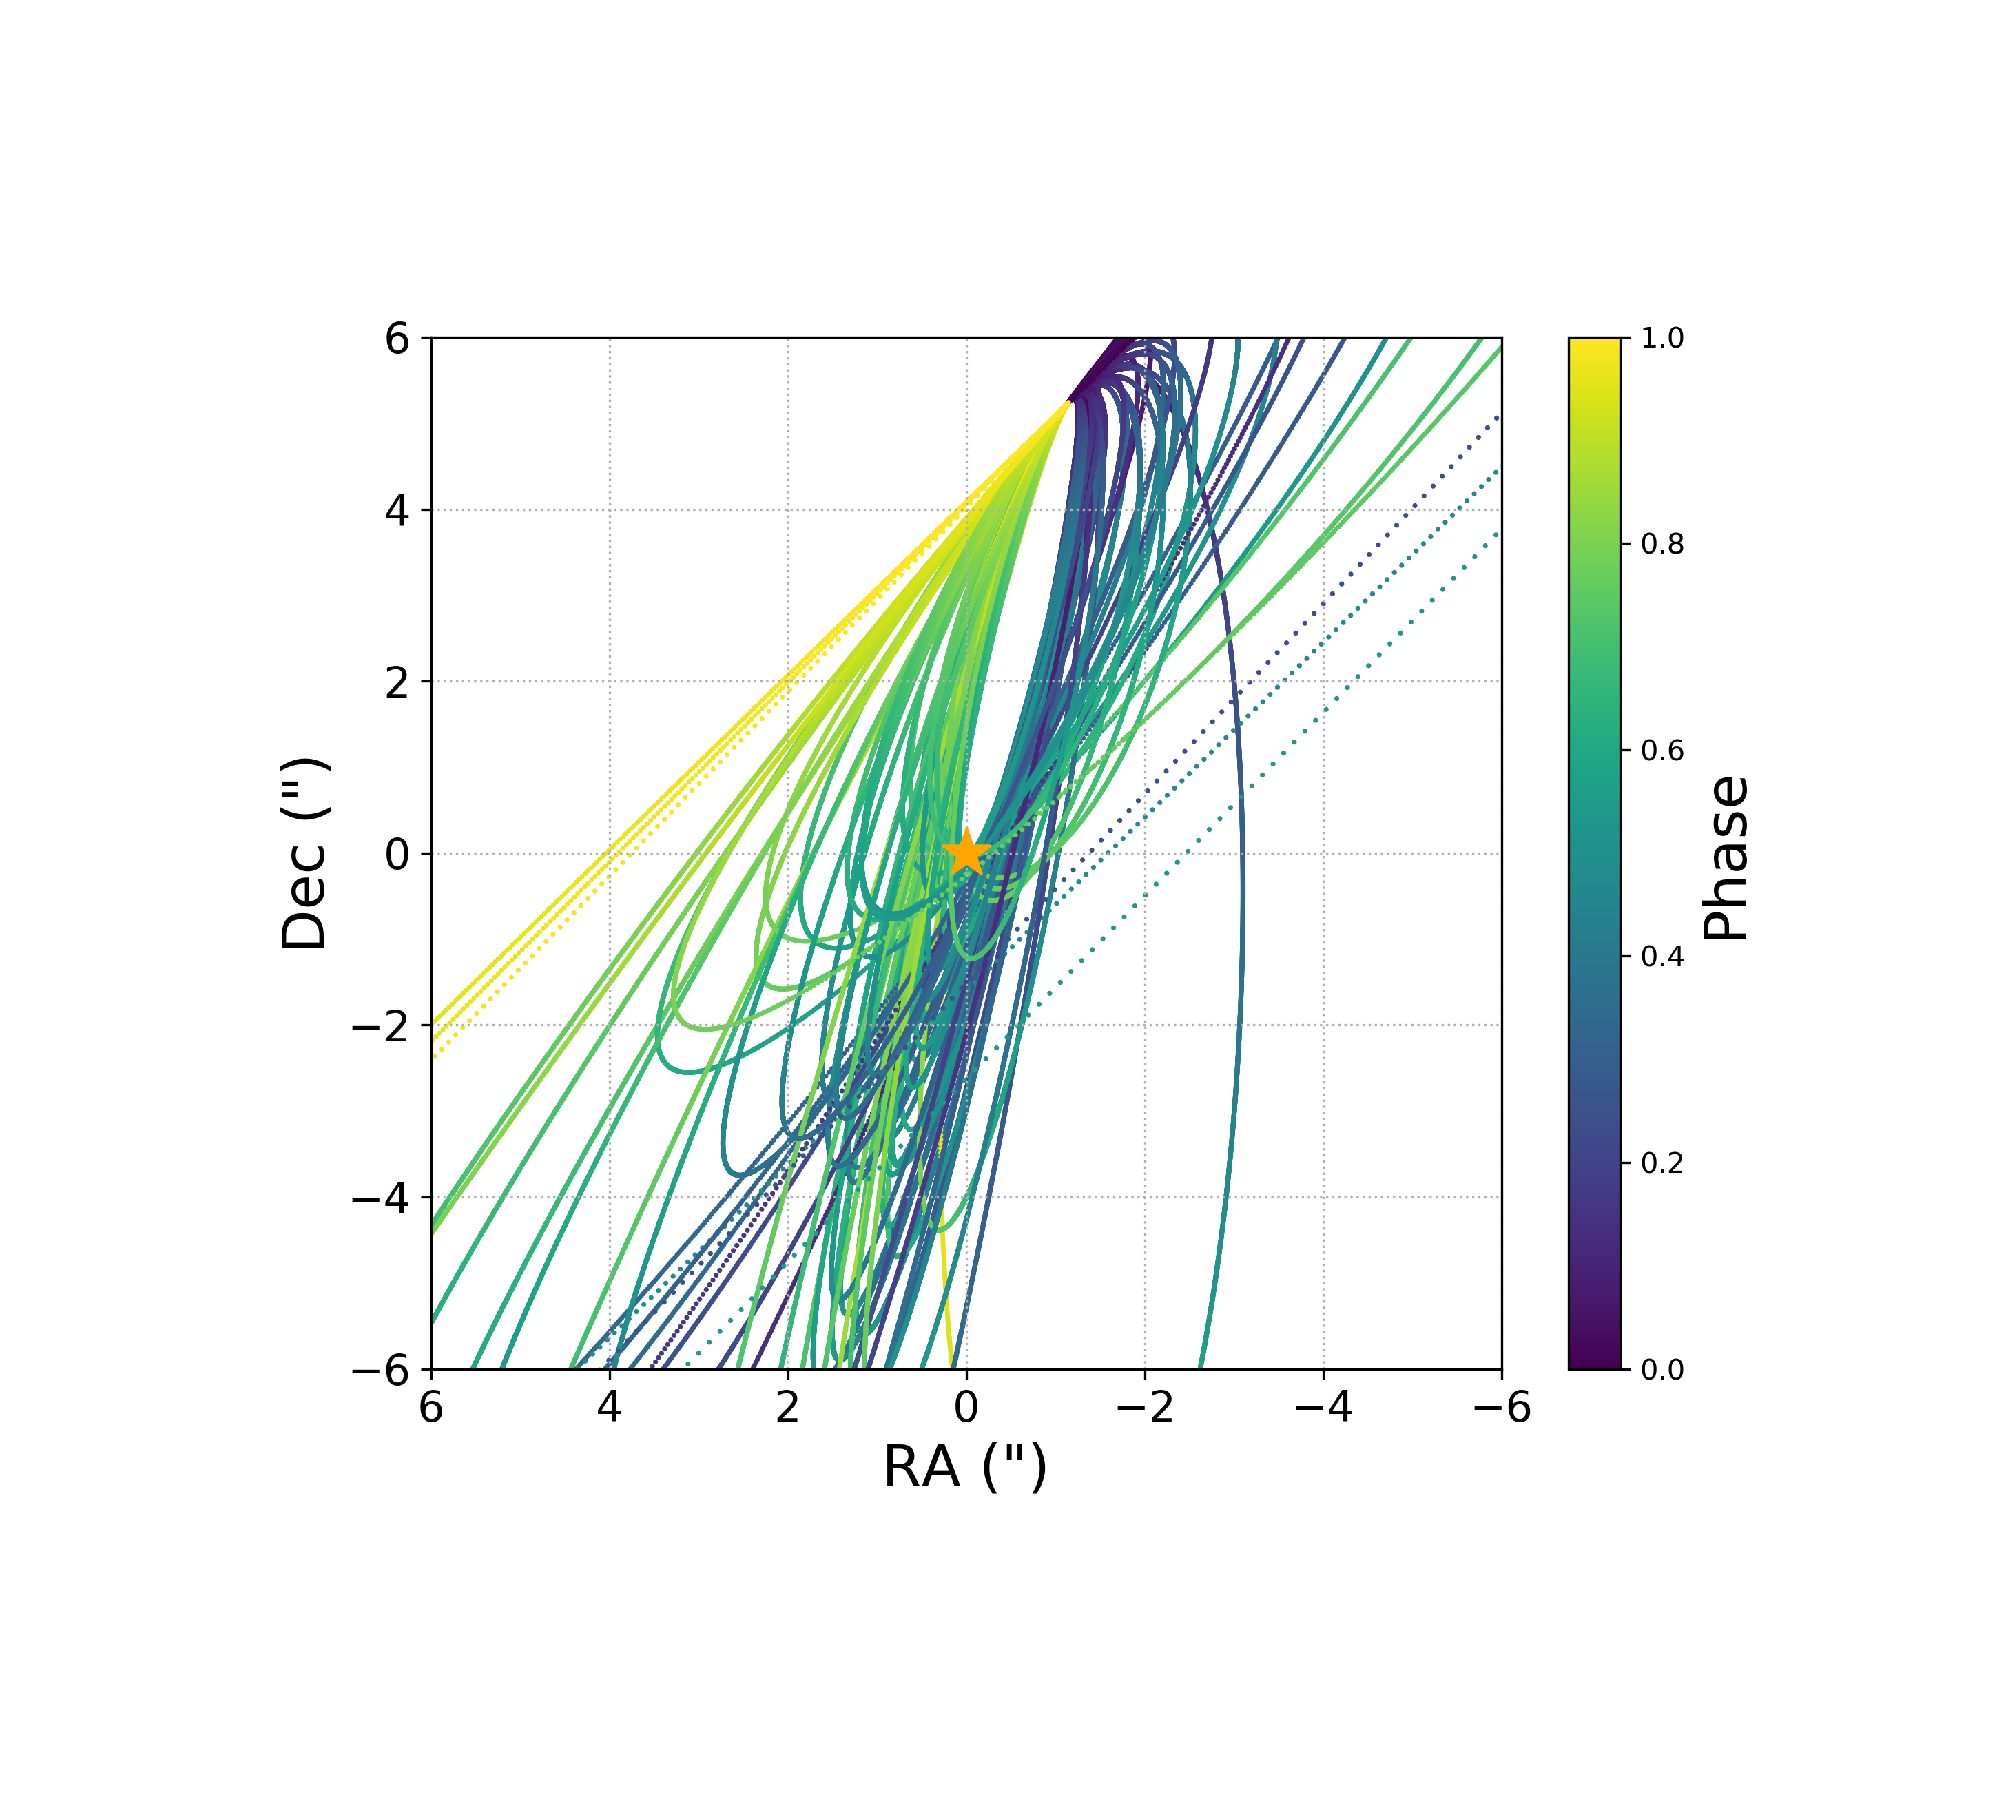

In [12]:
%matplotlib notebook
img = mpimg.imread(directory+'/orbits.png')
plt.figure(figsize=(10, 9.))
plt.imshow(img)
plt.axis('off')
plt.show()

## orbits_3d.png

<IPython.core.display.Javascript object>


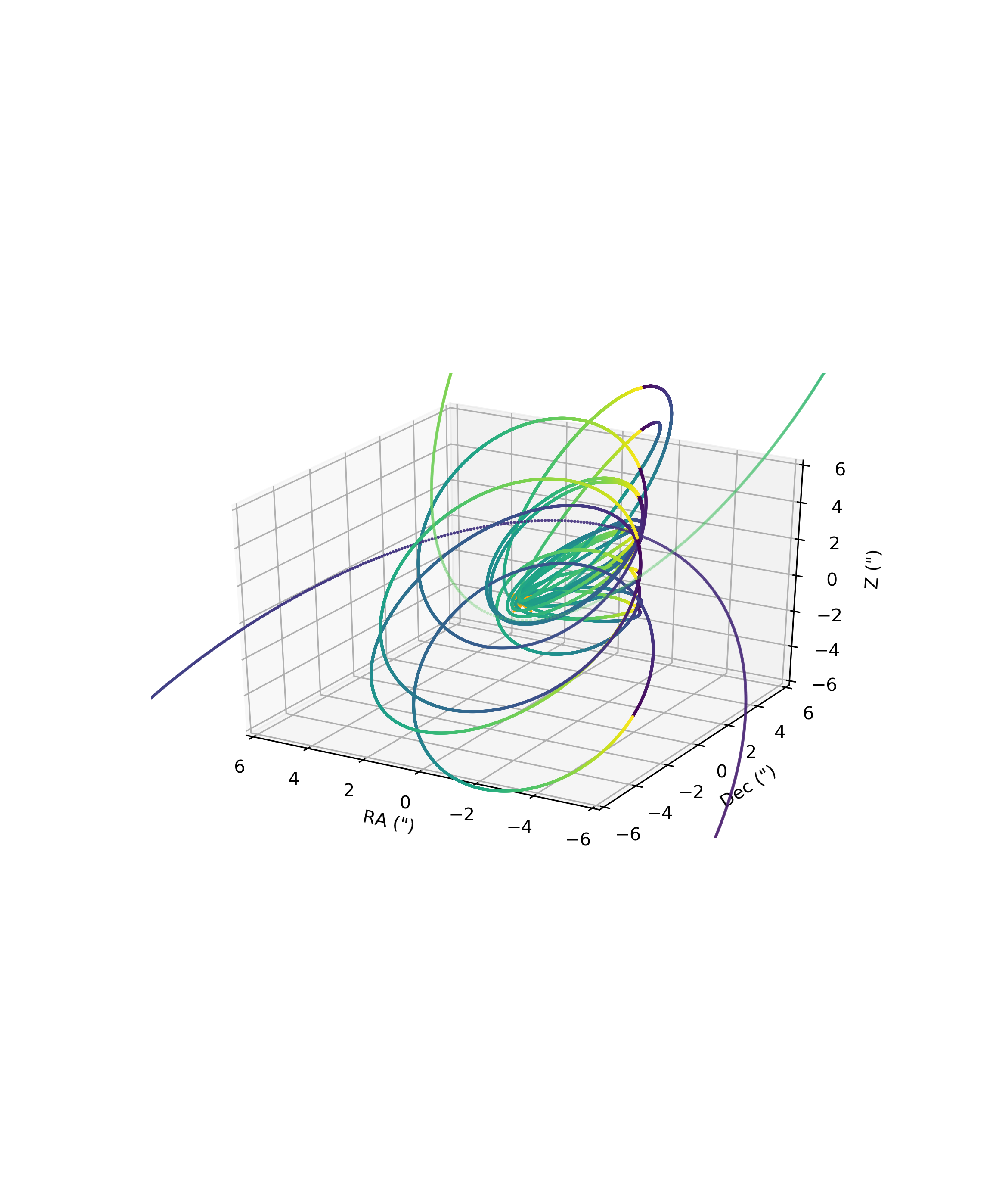

In [13]:
%matplotlib notebook
img = mpimg.imread(directory+'/orbits_3d.png')
plt.figure(figsize=(5, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

## One of the observables posteriors:
This is the distribution of acceleration in RA from the orbits in the posterior sample:

<IPython.core.display.Javascript object>


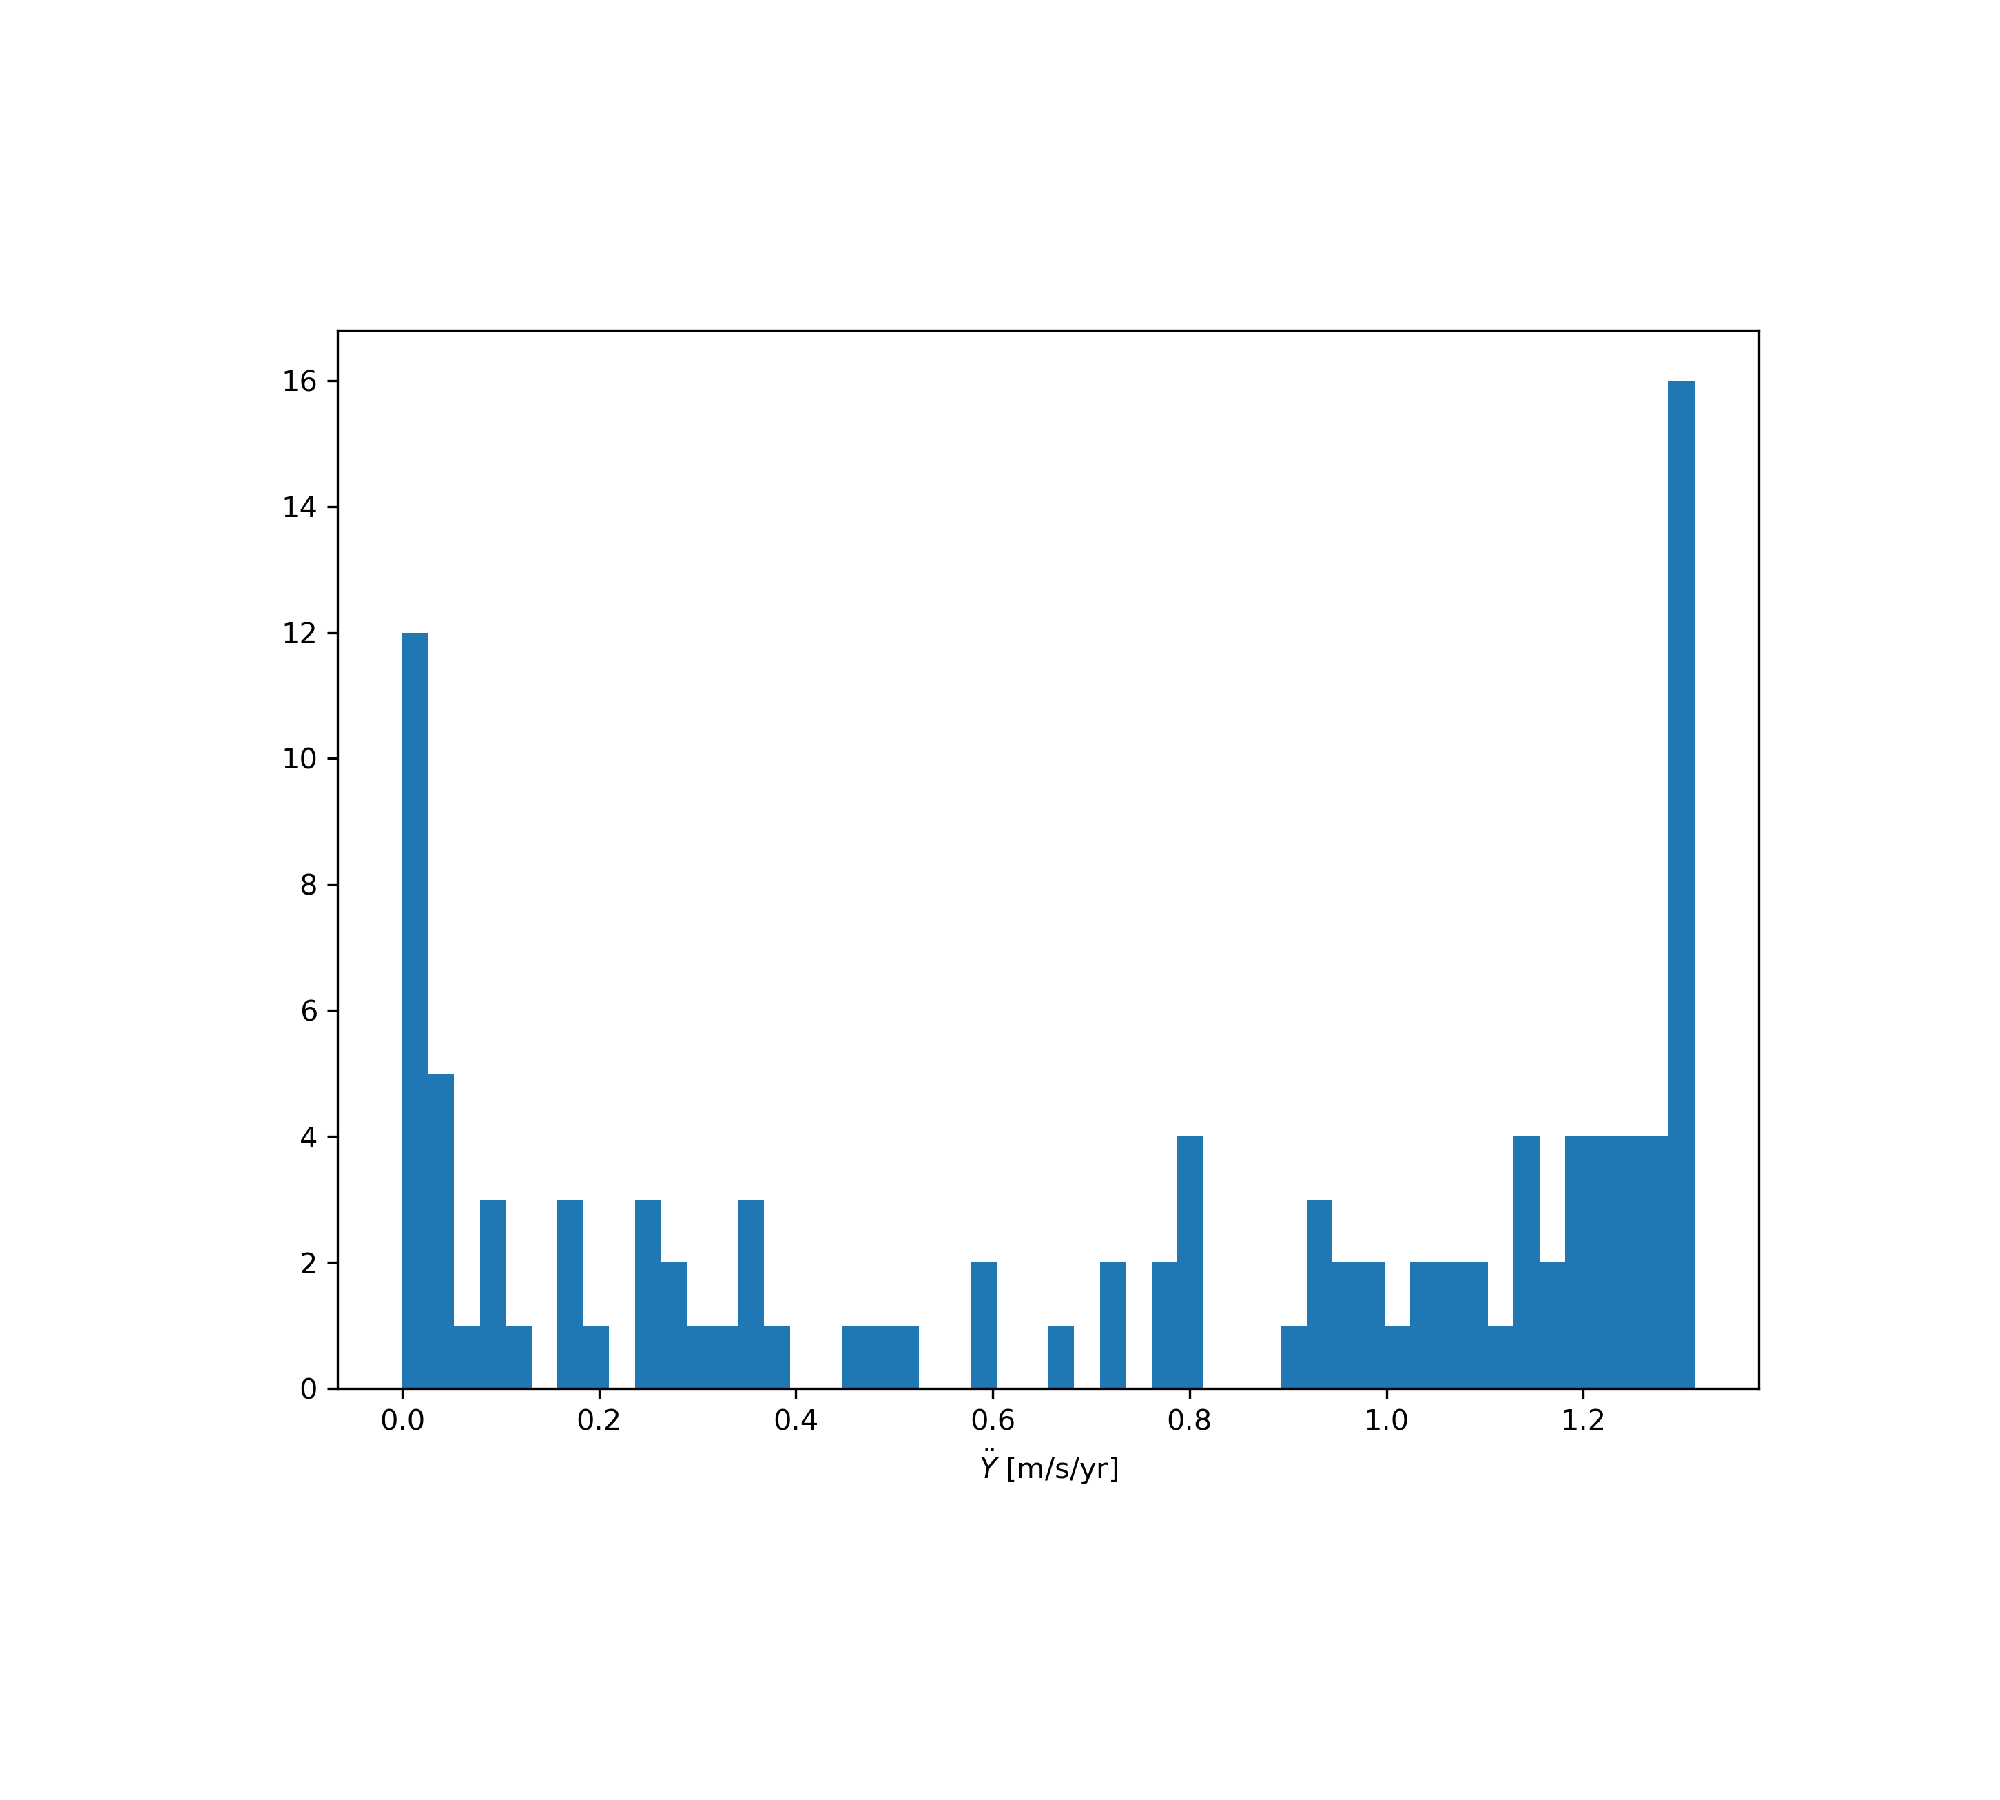

In [14]:
%matplotlib notebook
img = mpimg.imread(directory+'/observable_posteriors/yddot.png')
plt.figure(figsize=(10, 9.))
plt.imshow(img)
plt.axis('off')
plt.show()

## stats.txt:
The stats file looks like this inside (the parameters are already written in Latex math mode):

Parameter    Mean    Std    Mode    68% Min Cred Int    95% Min Cred Int <br>
$a \; (AU)$    440.273860033696    778.7828994666231    167.91369902260953    (120.78742643128001, 335.5722381365086)    (120.78742643128001, 1440.6607692140242) <br>
$e$    0.7363533729151298    0.25417521870515686    0.9354707541002492    (0.7079602799311652, 0.9944789694374682)    (0.11403236837364339, 0.9944789694374682) <br>
$ i \; (deg)$    102.21552571902514    12.315962182778556    96.93037897540756    (93.85757612975858, 104.21407925155971)    (91.20949059969848, 129.6667081849308)<br>
$ \omega \; (deg)$    170.14767463219783    99.64182945955947    110.92869998371395    (13.407759062840405, 220.04147746284139)    (5.060697734275732, 336.04000373968086)<br>
$\Omega \; (deg)$    37.72898415688386    94.40123009172831    -29.405473241926238    (-45.72234936546789, 143.51214034948345)    (-119.84686434942489, 179.66687380258452)<br>
$T_0 \; (yr)$    -5266.072718030055    41405.54729054067    1390.9519132615283    (-387.5345674226005, 1637.8029937252832)    (-13979.8862767336, 1939.049329542796)<br>
$a\,(1-e) \; (AU)$    109.41920890604749    219.0675705854163    26.869332294301532    (0.9391792185192334, 117.30940253868981)    (0.9391792185192334, 263.2353692706762)<br>

# GIGO: Poor Gaia solutions will give poor orbit fits!

The Gaia astrometric solution assumes that all point sources are single stars, and that their motion was linear (no acceleration) during the time series images used to arrive at the astrometric solution.  If a source is actually an unresolved multiple system, or if the binary is resolved but orbital acceleration was large enough to affect the astrometric solution, the solution will not be reliable.  This is best quantified in the Renormalized Unit Wight Error (RUWE) parameter (see https://gea.esac.esa.int/archive/documentation/GDR2/Gaia_archive/chap_datamodel/sec_dm_main_tables/ssec_dm_ruwe.html).  And RUWE >~ 1.2 indicates an unreliable solution. <br><br>
LOFTI will look at the RUWE and raise a warning if it's greater than 1.2, and ask if you really want to do this.<br><br>
Kepler 444 is a triple system (Dupuy et al. 2016).  Kepler 444 A is resolved in Gaia, but Kepler 444 B and C aren't resolved. 

In [3]:
Kepler444BC = 2101486923382009472
Kepler444A = 2101486923385239808
fitorbit(Kepler444BC, Kepler444A, verbose=True)

Computing constraints.
Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
Finished computing constraints:
Delta RA, err in mas: 1754.9243128632852 0.3189517009128414
Delta Dec, err in mas: 544.4546301538144 0.5744290942303749

pmRA, err in km/s: -1.4105342203867228 0.16512004559558907
pmDec, err in km/s: 1.9312076961988849 0.175587192939648
deltaRV, err im km/s (pos towards observer): 0.0 0.0

Total relative velocity [km/s]: 2.391478612227127 +/- 0.24103006406237912
Total plane-of-sky relative velocity [mas/yr]: 15.03161860446753 +/- 1.5086728000824803

sep,err [mas] 1837.4412911195748 0.34862183330431934 pa,err [deg]: 72.76381454087225 0.01736614347812121
sep [AU] 61.666994140223395
sep, err [km] (9225251015.846796, 0.0) (1750327.4457696672, 0.0)
D_star 33.561341218498995 +\- 0.28704379047656037
Delta Gmag 3.6348228
RUWE source 1: 16.686954
RUWE source 2: 1.0002892

Does this look good? Hit enter to start the fit, n to exit: 
Yeehaw 

The RUWE for Kepler 444 BC is much too large to give a reliable orbit fit, and the script raised a warning to let us know this.  GL 896 is another case where the RUWE for one source is too large, this time because the orbit exhibited acceleration during the Gaia observations.  See Pearce et al. 2019 for further discussion.